## 로지스틱 회귀

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [10]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [15]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


누락된 값이 없음을 확인할 수 있다

누락된 값이 있을 경우 그 데이터를 버리거나, 평균값으로 채운 뒤 사용할 수 있다

In [17]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


각 특성의 스케일이 다름을 알 수 있다

StandardScaler함수를 호출해 특성의 표준화 필요

In [25]:
wine_input = wine[['alcohol', 'sugar', 'pH']].to_numpy()
wine_target = wine['class'].to_numpy()

In [30]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(wine_input, wine_target,test_size=0.2, random_state=42)

train_input.shape

(5197, 3)

In [31]:
test_input.shape

(1300, 3)

In [33]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [34]:
train_scaled

array([[ 0.01376574,  0.4646116 , -0.16888369],
       [ 1.60871671, -0.70299854,  0.26967864],
       [ 1.10504798, -0.70299854,  1.20945505],
       ...,
       [-0.82568214,  0.0267578 ,  0.14437512],
       [-0.82568214,  0.52716215, -0.23153545],
       [-0.82568214, -0.57789745,  1.83597265]])

In [38]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)
lr.score(train_scaled, train_target)

0.7808350971714451

In [39]:
lr.score(test_scaled, test_target)

0.7776923076923077

In [40]:
lr.coef_

array([[ 0.51270274,  1.6733911 , -0.68767781]])

In [41]:
lr.intercept_

array([1.81777902])

합이 0보다 작으면 레드와인, 크면 화이트 와인

단, 로지스틱 회귀의 경우 정확도가 낮음

## 결정트리

In [42]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)
dt.score(train_scaled, train_target)

0.996921300750433

In [44]:
dt.score(test_scaled, test_target)

0.8592307692307692

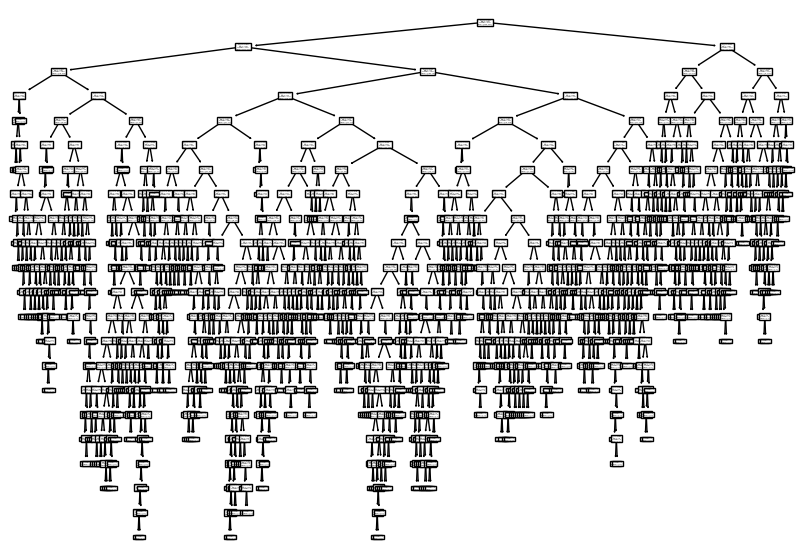

In [49]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,7))
plot_tree(dt)
plt.show()

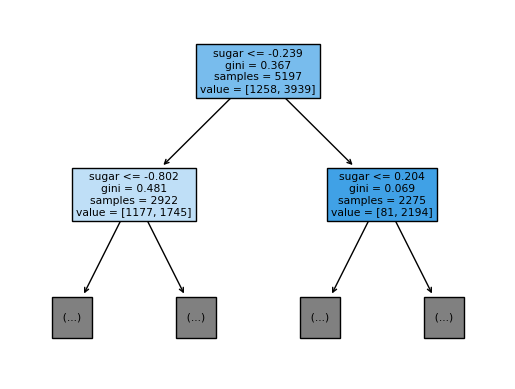

In [51]:
plot_tree(dt, max_depth = 1, filled=True, feature_names=['alchohol', 'sugar', 'pH'])
plt.show()

#### 지니불순도 (230pg)

### 가지치기

훈련세트에는 잘 맞지만, 테스트 트에서는 잘 맞지 않음

In [53]:
df = DecisionTreeClassifier(max_depth=3, random_state=42)
df.fit(train_scaled, train_target)
df.score(train_scaled, train_target)

0.8454877814123533

In [54]:
df.score(test_scaled, test_target)

0.8415384615384616

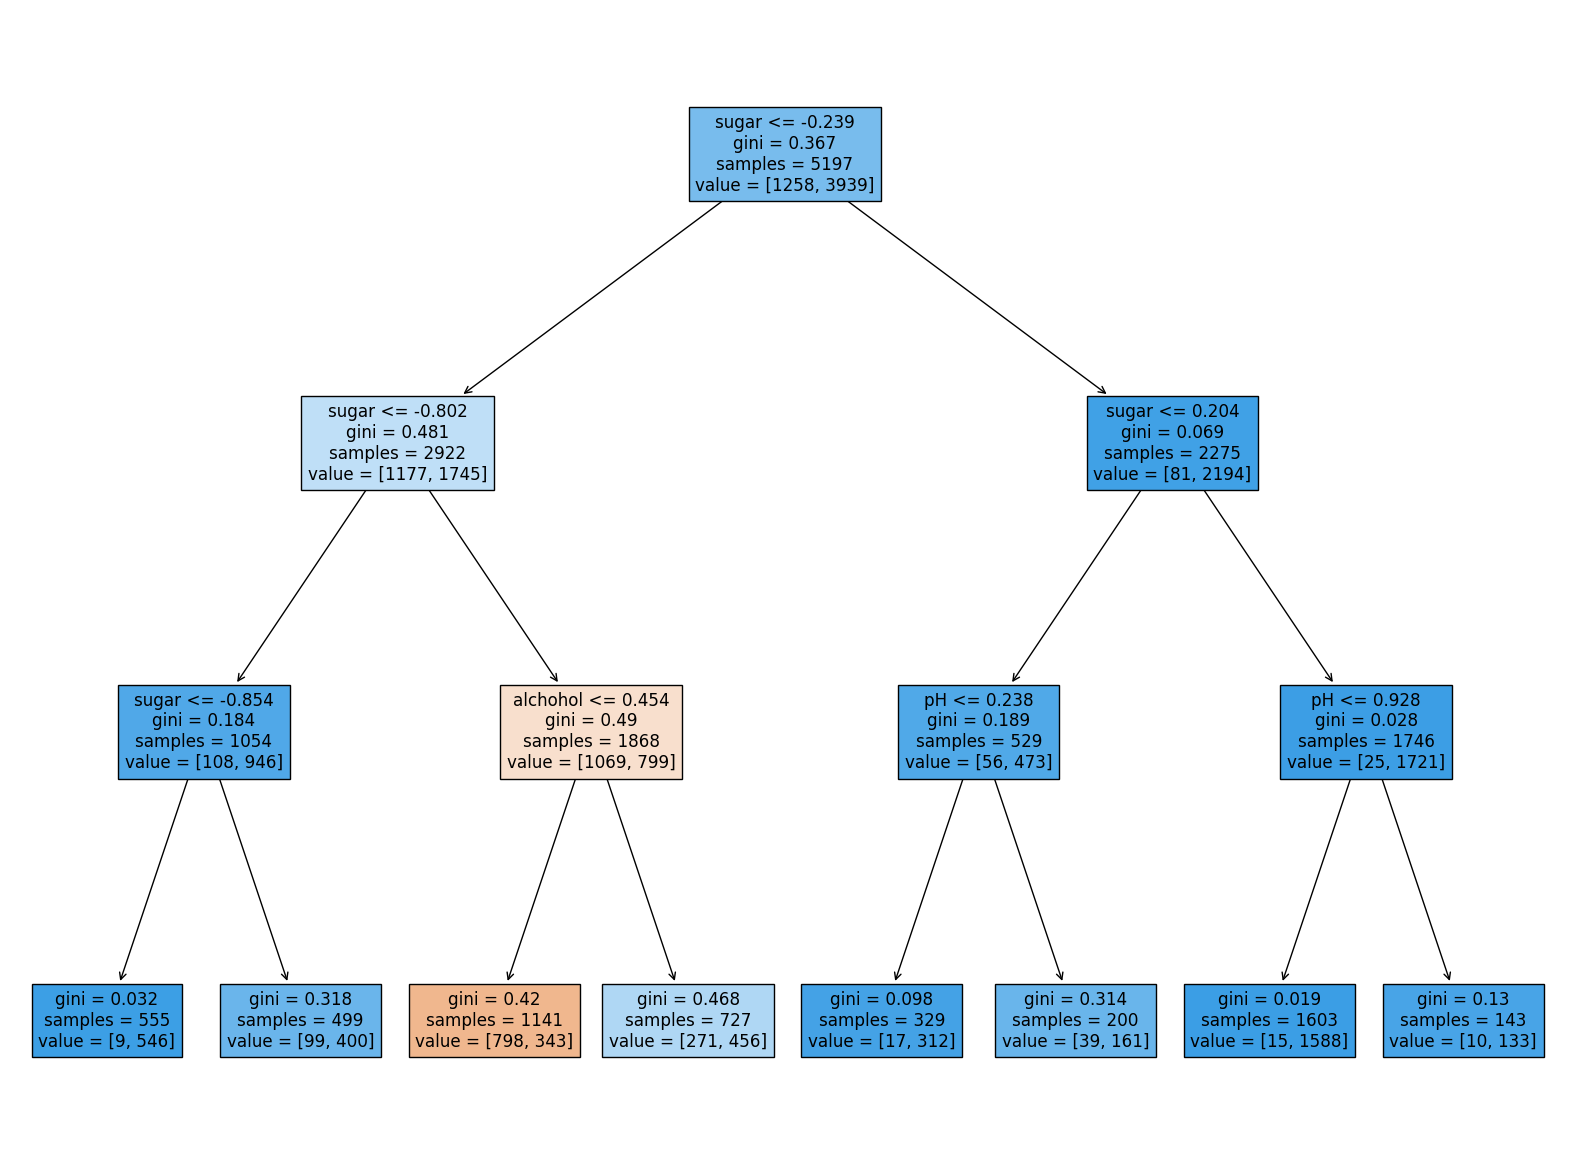

In [58]:
plt.figure(figsize=(20,15))
plot_tree(df, filled=True, feature_names=['alchohol', 'sugar', 'pH'])
plt.show()

In [60]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_input, train_target)
dt.score(train_input, train_target)

0.8454877814123533

In [61]:
dt.score(test_input, test_target)

0.8415384615384616

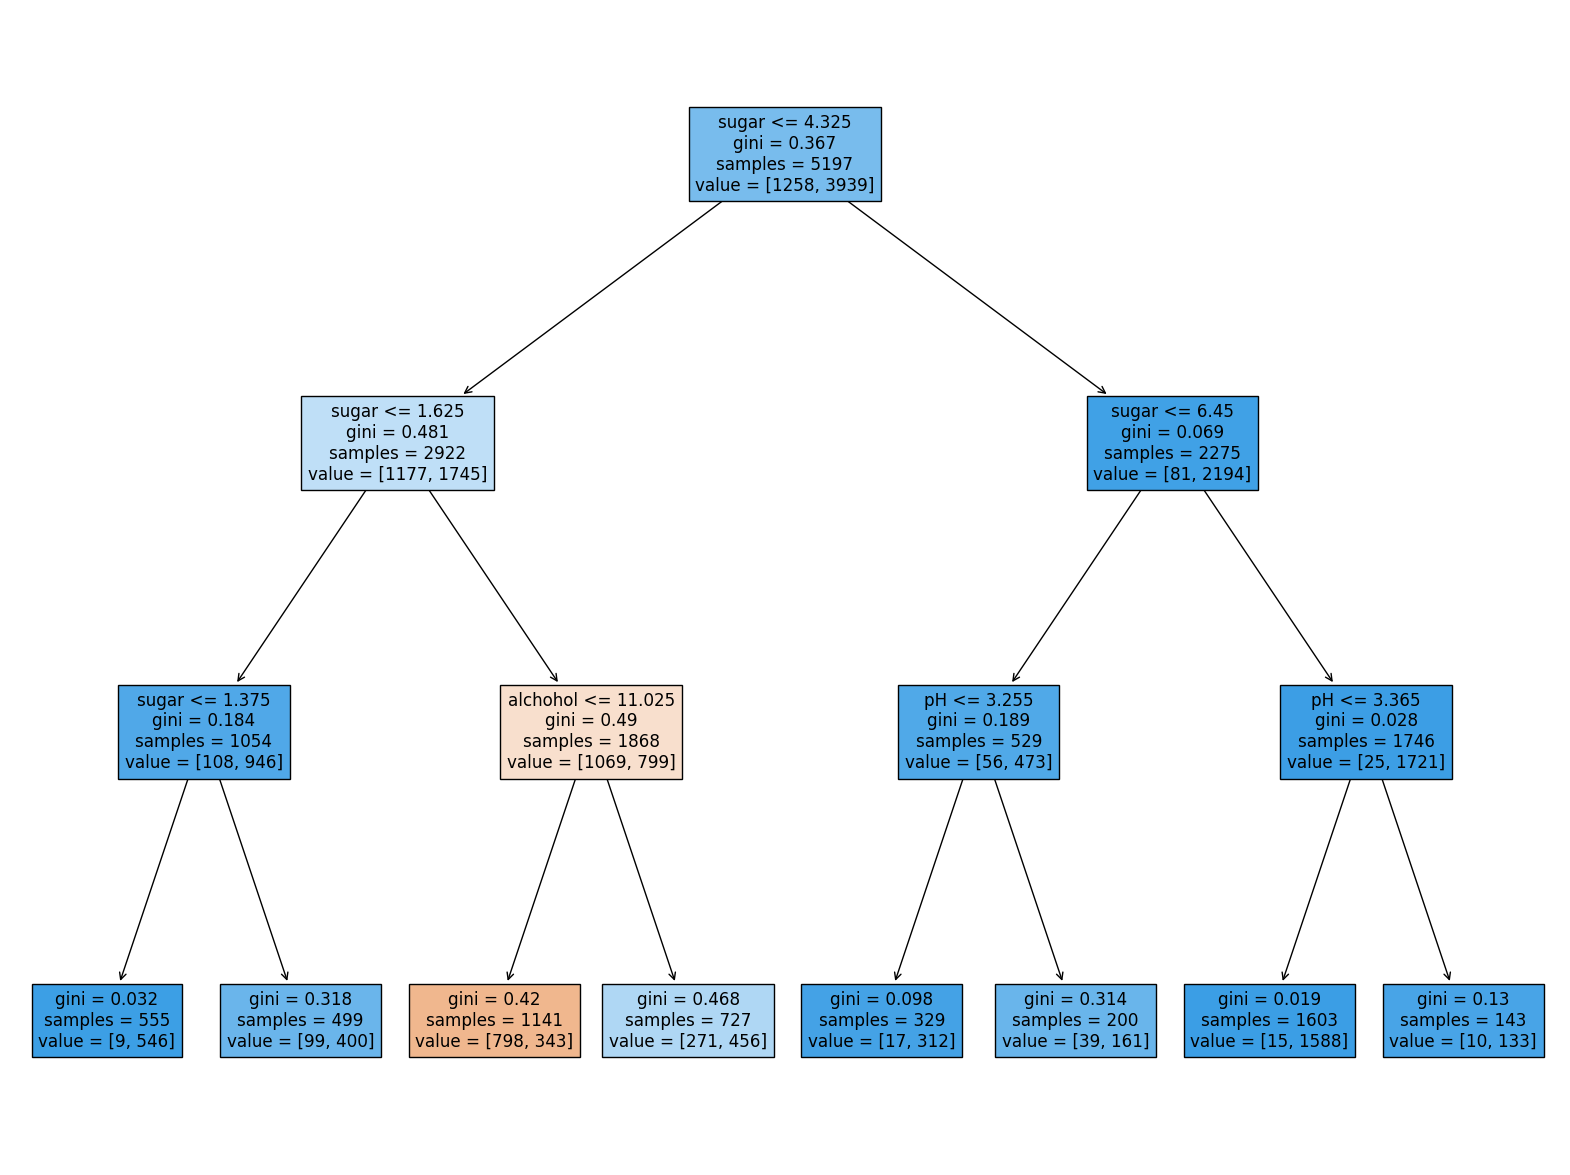

In [64]:
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alchohol', 'sugar', 'pH'])
plt.show()

In [67]:
df.feature_importances_
#어떤 특성이 가장 유용한지 특성 중요도 계산

array([0.12345626, 0.86862934, 0.0079144 ])